<a href="https://colab.research.google.com/github/marzier/CSC481/blob/main/ramirez_nicholas_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student_scores.csv')



In [43]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [44]:
X = df.drop('Scores', axis=1)
y = df['Scores']



In [45]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


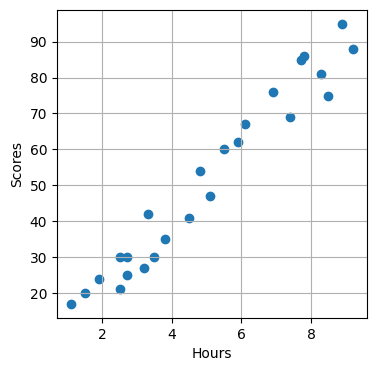

In [46]:
plt.figure(figsize=(4,4))

plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


In [47]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

In [49]:
X_train

,Hours
20,2.7
21,4.8
4,3.5
0,2.5
10,7.7
5,1.5
2,3.2
1,5.1
18,6.1
24,7.8


In [50]:
# initialize your LR model and set parameters

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

In [51]:
alpha = model.intercept_
beta = model.coef_

print('alpha', alpha)
print('beta', beta)

print(f'y = {alpha} + {beta[0]}X')

alpha -0.33798242262133016
beta [10.28085594]
y = -0.33798242262133016 + 10.280855941918228X


In [52]:
#calculate the actual and estimated presponses for both training and testing

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



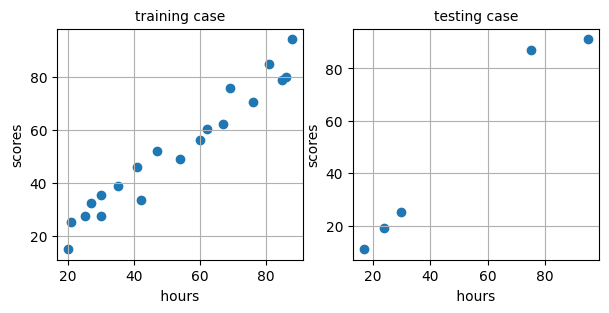

In [53]:
#draw the actual and est in both train and testing cases

plt.figure(figsize=(7,3))

#subplot 1
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train)
plt.title('training case', fontsize=10)

plt.xlabel(' hours ')
plt.ylabel('scores')

plt.grid(True)

#subplot 1
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test)
plt.title('testing case',fontsize=10)

plt.xlabel(' hours ')
plt.ylabel('scores')


plt.grid(True)

plt.show()


In [54]:
#calculate model and performance MSE and MAE

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)



In [55]:
mae_train


4.871914405808175

In [56]:
mse_train

26.118427588842174

In [57]:
# create dataframe of the results

performance_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'MSE', 'MAE'],
    'DataType':['train', 'train', 'test', 'test'],
    'Values':[mse_train, mae_train, mse_test, mae_test]
})

performance_df.T



,0,1,2,3
Metric,MSE,MAE,MSE,MAE
DataType,train,train,test,test
Values,26.118428,4.871914,48.168143,6.271379


In [58]:
print('done')

done
